In [1]:
from array import array
import math
import numpy as np
from scipy import stats
import random

In [2]:
def generator_function(x,par,ichoice):
    if ichoice == 5:
        return par[0]+par[1]*x+par[2]*x*x+par[3]*x*x*x
    elif ichoice == 6:
        return par[0]+par[1]*x+par[2]*x*x
    else:
        return par[0]+par[1]*x

In [3]:
ichoice = 6

In [4]:
if ichoice == 1:
    m = 1
    n = 15
    jitter = array('d')
    jitter = [-2,2,-1,1,0,-2,2,-1,1,0,-2,2,-1,1,0]
    sigma = array('d')
    sigma = [7,6,5,4,3,2,1,.5,1,2,3,4,5,6,7]
elif ichoice == 2:
    m = 1
    n = 10
    jitter = array('d')
    jitter = [.3,.2,-.5,-.2,.2,.6,-.4,-1.5,.7,.5]
    sigma = array('d')
    sigma = [0.51,0.51,0.51,0.51,0.51,0.51,0.51,0.51,0.51,0.51]
elif ichoice == 3:
    m = 1
    n = 15
    jitter = array('d')
    jitter = [-2,2,-1,1,0,-2,2,-1,1,0,-2,2,-1,1,0] 
    sigma = array('d')
    sigma = [.7,6,5,4,3,2,1,.5,1,2,3,4,5,6,.7]
elif ichoice == 4:
    m = 1
    n = 15
    jitter = array('d')
    jitter = [-2,2,-1,1,0,-2,2,-1,1,0,-2,2,-1,1,0]
    sigma = array('d') 
    sigma = [1,2,3,4,5,6,7,8,7,6,5,4,3,2,1]
elif ichoice == 5:
    m = 3
    n = 15
    jitter = array('d')
    jitter = [-2,2,-1,1,0,-2,2,-1,1,0,-2,2,-1,1,0]
    sigma = array('d')
    sigma = [7,6,5,4,3,2,1,.5,1,2,3,4,5,6,7]
elif ichoice == 6:
    m = 2
    n = 15
    jitter = array('d')
    jitter = [-2,2,-1,1,0,-2,2,-1,1,0,-2,2,-1,1,0]
    sigma = array('d')
    sigma = [1,2,3,4,5,6,7,8,7,6,5,4,3,2,1]
else:
    print("Invalid choice!!!!")

In [5]:
x = array('d')
y = array('d')
ex = array('d')
ey = array('d')

In [6]:
par = array('d')
if ichoice == 2:
    par.append(6.81)
    par.append(0.656)
elif ichoice == 5:
    par.append(1.80)
    par.append(4.05)
    par.append(0.00)
    par.append(0.20)
elif ichoice == 6:
    par.append(1.80)
    par.append(4.05)
    par.append(5.10)
else:
    par.append(1.80)
    par.append(4.05)

random.seed(1)

for i in range(0,n):
    if ichoice == 2:
        x.append(41.0+i*1.0)
    else:
        x.append(-4.0+8.0*i/(n+1))
    y.append(generator_function(x[i],par,ichoice)+jitter[i])
    ex.append(0.0)
    ey.append(sigma[i])

In [7]:
m_params = m + 1
a = np.zeros(shape = (m_params,m_params))
v = np.zeros(shape = (m_params,1))

In [8]:
for k in range(0,m_params):
    for i in range(0,n):
        v[k][0]=v[k][0]+y[i]*math.pow(x[i],k)/math.pow(ey[i],2)
    #print ("v[%d] = %f" % (k,v[k][0]))
    for j in range(0,m_params):
        for i in range(0,n):
            a[k][j]=a[k][j]+math.pow(x[i],k+j)/math.pow(ey[i],2)
        #print ("a[%d][%d] = %f" %(k,j,a[k][j]))
        
print ("A matrix = ")        
print (a)
print("V matrix = ")
print (v)

ainv = np.linalg.inv(a)
u1 = np.dot(a,ainv)

print ("A_inverse = ")
print (ainv)
print ("Diagonal Check:")
print (u1)
coeff = ainv*np.matrix(v)
print ("Coefficients:")
for k in range(0,m+1):
    print("k = %d, coeff = %f +/- %f" % (k,coeff[k],math.pow(ainv[k][k],0.5)))

A matrix = 
[[  3.0392191   -1.51960955  31.8944533 ]
 [ -1.51960955  31.8944533  -47.08187518]
 [ 31.8944533  -47.08187518 398.66058611]]
V matrix = 
[[ 160.60320925]
 [-106.69263411]
 [1874.64425129]]
A_inverse = 
[[ 3.38085693 -0.2884941  -0.30455337]
 [-0.2884941   0.06259129  0.03047273]
 [-0.30455337  0.03047273  0.03047273]]
Diagonal Check:
[[ 1.00000000e+00 -4.82737085e-17  6.12838393e-17]
 [ 1.18599363e-15  1.00000000e+00 -1.19060554e-16]
 [-2.51687870e-15  1.98758848e-15  1.00000000e+00]]
Coefficients:
k = 0, coeff = 2.827437 +/- 1.838711
k = 1, coeff = 4.114422 +/- 0.250183
k = 2, coeff = 4.962064 +/- 0.174564


In [9]:
yfit = 0
chi2 = 0
rho = array('d')

for i in range(0,n):
    for j in range(0,m+1):
        yfit = yfit + coeff[j]*math.pow(x[i],j)
    print ("i = %d  y = %f  yfit = %f" % (i,y[i],yfit))
    chi2 = chi2 + math.pow(((yfit-y[i])/ey[i]),2)
    yfit = 0
    
chi2perdof = chi2/(n-m)
print ("chi2/dof = %f / %f" % (chi2,(n-m-1)))

rho = np.zeros(shape = (m_params,m_params))

for k in range(0,m_params):
    for j in range(0,m_params):
        rho[k][j]=rho[k][j]+ainv[k][j]/math.sqrt(ainv[k][k]*ainv[j][j])    
print (rho)

i = 0  y = 65.200000  yfit = 65.762774
i = 1  y = 52.100000  yfit = 49.212245
i = 2  y = 34.550000  yfit = 35.142747
i = 3  y = 24.550000  yfit = 23.554282
i = 4  y = 14.100000  yfit = 14.446849
i = 5  y = 5.200000  yfit = 7.820448
i = 6  y = 4.850000  yfit = 3.675079
i = 7  y = 0.050000  yfit = 2.010742
i = 8  y = 2.800000  yfit = 2.827437
i = 9  y = 5.100000  yfit = 6.125164
i = 10  y = 8.950000  yfit = 11.903923
i = 11  y = 21.350000  yfit = 20.163715
i = 12  y = 29.300000  yfit = 30.904538
i = 13  y = 44.800000  yfit = 44.126394
i = 14  y = 59.850000  yfit = 59.829282
chi2/dof = 3.652416 / 12.000000
[[ 1.         -0.62714301 -0.94884294]
 [-0.62714301  1.          0.69774823]
 [-0.94884294  0.69774823  1.        ]]


In [10]:
xfiterr = array('d')
yfiterr = array('d')
yfitplus2 = array('d')
yfitminus2 = array('d')

for i in range(0,n):
    if ichoice == 2:
        xfiterr.append(41.0+i*1.0)
    else:
        xfiterr.append(-4.0+8.0*i/(n+1))
    yerror2 = 0.0
    yval = 0.0
    for k in range(0,m+1):
        for j in range(0,m+1):
            term = rho[k][j]*math.pow(xfiterr[i],k)*math.pow(ainv[k][k],0.5)*(math.pow(xfiterr[i],j)*math.pow(ainv[j][j],0.5))
            #print (k,j,term)
            yerror2 = yerror2 + term
        yval = yval + coeff[k]*math.pow(xfiterr[i],k)
    yfiterr.append(yval)
    yfitplus2.append(yval+math.sqrt(yerror2))
    yfitminus2.append(yval-math.sqrt(yerror2))
    print(i,xfiterr[i],yval,math.sqrt(yerror2),yfitplus2[i],yfitminus2[i])

0 -4.0 [[65.76277439]] 0.9192779034343471 66.6820522969911 64.8434964901224
1 -3.5 [[49.21224484]] 0.8156461908569923 50.027891031292434 48.39659864957844
2 -3.0 [[35.14274739]] 1.0079415135437633 36.150688901438286 34.13480587435076
3 -2.5 [[23.55428204]] 1.2828382571716561 24.837120293105656 22.271443778762347
4 -2.0 [[14.44684878]] 1.532570218546709 15.979419003100588 12.91427856600717
5 -1.5 [[7.82044763]] 1.7219920734264076 9.54243970718056 6.098455560327744
6 -1.0 [[3.67507858]] 1.83871067126424 5.513789254799059 1.8363679122705796
7 -0.5 [[2.01074163]] 1.878033153552698 3.8887747874485825 0.1327084803431866
8 0.0 [[2.82743678]] 1.8387106712642398 4.666147456101585 0.988726113573106
9 0.5 [[6.12516404]] 1.7219920734264074 7.847156109785611 4.403171962932796
10 1.0 [[11.90392339]] 1.5325702185467094 13.436493607008167 10.371353169914748
11 1.5 [[20.16371484]] 1.2828382571716561 21.44655309831576 18.88087658397245
12 2.0 [[30.90453839]] 1.0079415135437637 31.912479907950917 29.8965

Welcome to JupyROOT 6.18/00
Fit 1: 3.652416 12.000000 



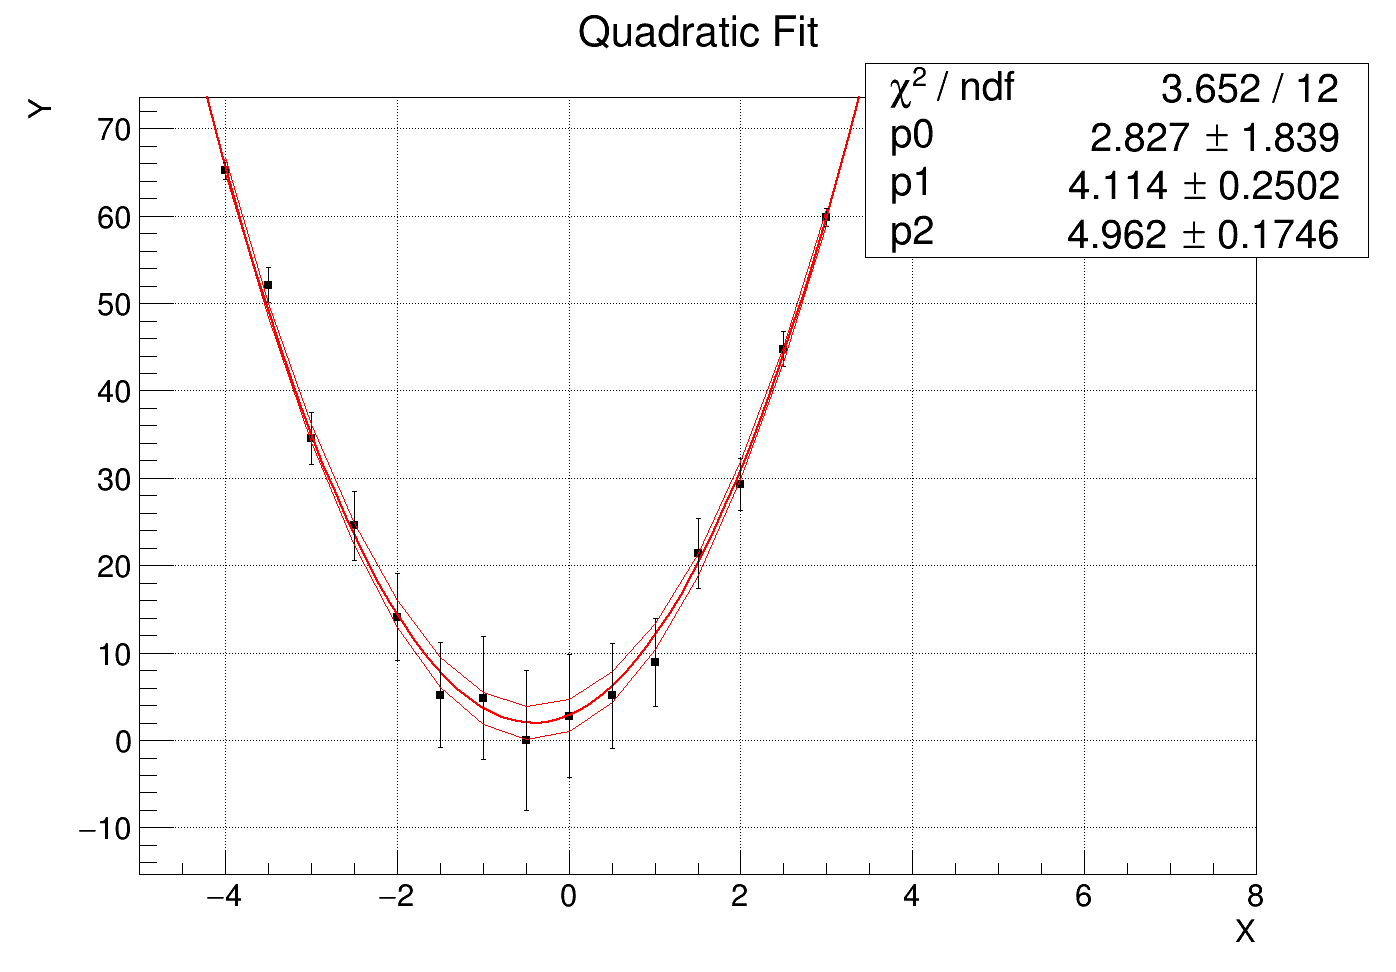

In [11]:
#print (n,x,y)

from ROOT import TCanvas, TFile
from ROOT import TGraph, TF1, TGraphErrors
from ROOT import gStyle
gStyle.SetOptFit(1)

c1 = TCanvas( 'c1', 'Simple Linear Fitting Example', 200, 10, 1400, 1000 )
c1.SetGridx()
c1.SetGridy()
c1.GetFrame().SetFillColor( 21 )
c1.GetFrame().SetBorderMode(-1 )
c1.GetFrame().SetBorderSize( 5 )

gr = TGraphErrors(n,x,y,ex,ey)
grp = TGraph(n,xfiterr,yfitplus2)
grm = TGraph(n,xfiterr,yfitminus2)

if ichoice == 5:
    pfit1 = TF1("pfit1","pol3")
elif ichoice == 6:
    pfit1 = TF1("pfit1","pol2")
else:
    pfit1 = TF1("pfit1","pol1")   
gr.SetMarkerStyle(21)
if ichoice == 6:
    gr.SetTitle("Quadratic Fit")
elif ichoice == 5:
    gr.SetTitle("Cubic Fit")
else:
    gr.SetTitle("Linear Fit")
gr.GetXaxis().SetTitle("X")
gr.GetYaxis().SetTitle("Y")
if ichoice == 2:
    gr.GetXaxis().SetLimits(40.0,55.0)
else:
    gr.GetXaxis().SetLimits(-5.0,8.0)   
#gr.GetHistogram().SetMaximum(5.0)
#gr.GetHistogram().SetMinimum(0.0)
gr.Fit("pfit1","q")
pfit1chi2 = pfit1.GetChisquare()
pfit1ndf = pfit1.GetNDF()
pfit1chi2ndf = pfit1chi2/pfit1ndf
print("Fit 1: %f %f \n" % (pfit1chi2,pfit1ndf))
gr.Draw("AP")
grp.SetLineColor(2)
grm.SetLineColor(2)
grp.Draw("L")
grm.Draw("L")
c1.Draw()

In [12]:
index=0
yfitvalue = 0.0
yerrorvalue = 0.0
for k in range(0,m_params):
    yfitvalue = yfitvalue + coeff[k]*math.pow(x[index],k)
    yerrorvalue = yerrorvalue + math.pow(math.pow(x[index],k)*math.pow(ainv[k][k],0.5),2)
yerrorvalue = math.sqrt(yerrorvalue)
print ("P201 Error Calculation = %f +/- %f " % (yfitvalue,yerrorvalue))
print ("Proper Error Calculation = %f +/- %f " % ((yfitplus2[index]+yfitminus2[index])/2.0,(yfitplus2[index]-yfitminus2[index])/2.0))


P201 Error Calculation = 65.762774 +/- 3.490464 
Proper Error Calculation = 65.762774 +/- 0.919278 
